Problem Statement A key challenge for property sellers is to determine the sale price of the property. Some are apparent and obvious, and some are not. Nevertheless, a rational approach aided by machine learning can be very useful in predicting the property price. A large data set with 79 different features (like living area, number of rooms, location, etc) along with their prices are provided for residential homes. The challenge is to learn a relationship between the important features and the price. Further, use it to predict the prices of a new set of houses.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',50)
plt.rcParams['figure.figsize']=[10,8]

In [2]:
df_price = pd.read_csv('houseprice.csv')
df_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_price.shape

(1460, 81)

In [4]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
cols = ['MSSubClass', 'OverallQual', 'OverallCond']

In [6]:
for i in cols:
    df_price[cols] = df_price[cols].astype(object)

In [7]:
(df_price.isnull().sum()/(df_price.index.size)*100)[(df_price.isnull().sum()/df_price.index.size)*100  > 0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [8]:
df_num = df_price.select_dtypes(include=np.number)
df_num = df_num.drop('SalePrice', axis=1)

df_cat = df_price.select_dtypes(exclude=np.number)

### Univariate Analysis

In [9]:
cols = list(df_num.columns)
cols

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

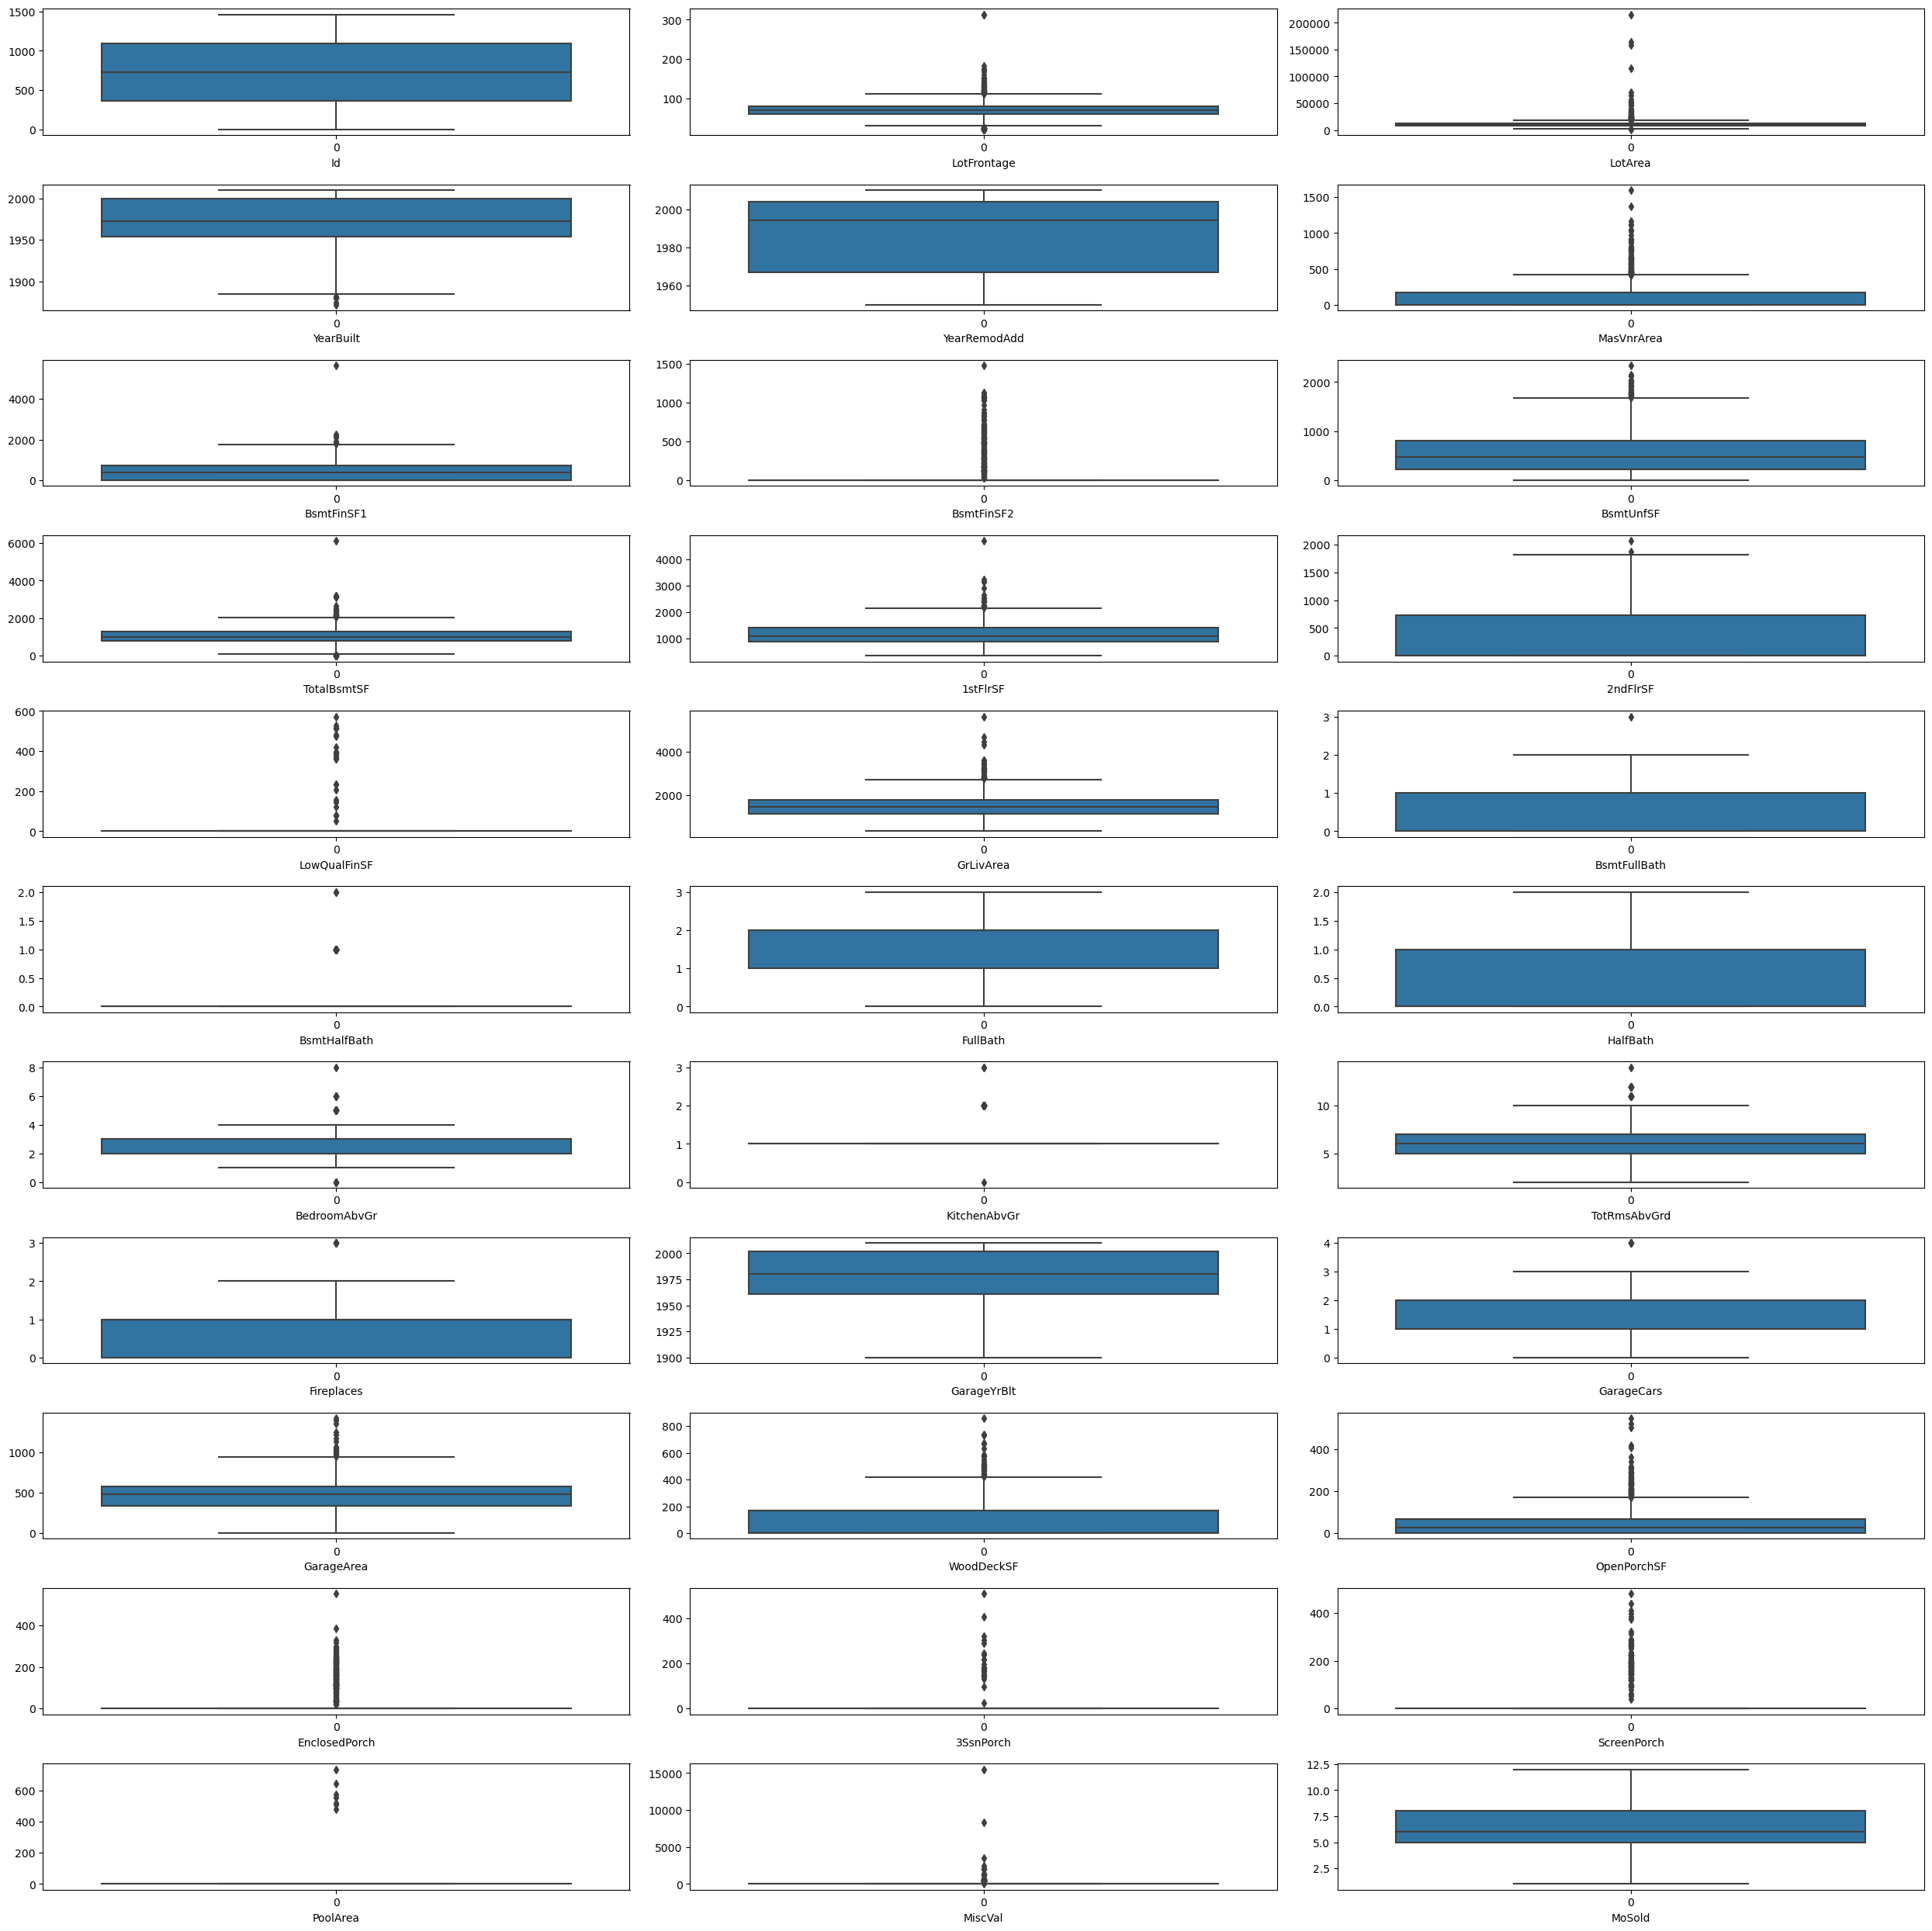

In [10]:
fig, ax = plt.subplots(11,3, figsize=(25,25))
for i, j in zip(df_num.columns, ax.flatten()):
    boxplt=sns.boxplot(df_num[i], ax=j)
    boxplt.set_xlabel(i, fontsize=10)
plt.tight_layout()
plt.show()

### KNN imputer

In [11]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_num_sc = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns)

In [12]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   YearBuilt      1460 non-null   float64
 4   YearRemodAdd   1460 non-null   float64
 5   MasVnrArea     1460 non-null   float64
 6   BsmtFinSF1     1460 non-null   float64
 7   BsmtFinSF2     1460 non-null   float64
 8   BsmtUnfSF      1460 non-null   float64
 9   TotalBsmtSF    1460 non-null   float64
 10  1stFlrSF       1460 non-null   float64
 11  2ndFlrSF       1460 non-null   float64
 12  LowQualFinSF   1460 non-null   float64
 13  GrLivArea      1460 non-null   float64
 14  BsmtFullBath   1460 non-null   float64
 15  BsmtHalfBath   1460 non-null   float64
 16  FullBath       1460 non-null   float64
 17  HalfBath       1460 non-null   float64
 18  BedroomA

All Numeric Numbers are imputed

### Impute Categories

In [13]:
(df_cat.isnull().sum()/(df_price.index.size)*100)[(df_cat.isnull().sum()/df_price.index.size)*100  > 0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [14]:
# Where ever data is avaliable mark is 1, else 0

In [15]:
df_cat['PoolQC_ava'] = df_cat['PoolQC'].replace(np.nan,0).replace('Gd',1).replace('Ex',1).replace('Fa',1)

In [16]:
df_cat['PoolQC_ava'].value_counts()

0    1453
1       7
Name: PoolQC_ava, dtype: int64

In [17]:
df_cat['MiscFeature_ava']=df_cat['MiscFeature'].replace(np.nan,0).replace('Shed',1).replace('Gar2',1).replace('Othr',1).replace('TenC',1)

In [18]:
df_cat['MiscFeature_ava'].value_counts()

0    1406
1      54
Name: MiscFeature_ava, dtype: int64

In [19]:
df_cat['Alley_ava']=df_cat['Alley'].replace(np.nan,0).replace('Grvl',1).replace('Pave',1)

In [20]:
df_cat['Alley_ava'].value_counts()

0    1369
1      91
Name: Alley_ava, dtype: int64

In [21]:
df_cat['Fence_ava']=df_cat['Fence'].replace(np.nan,0).replace('MnPrv',1).replace('GdPrv',1).replace('GdWo',1).replace('MnWw',1)

In [22]:
df_cat['Fence_ava'].value_counts()

0    1179
1     281
Name: Fence_ava, dtype: int64

In [23]:
df_cat['FireplaceQu_ava']=df_cat['FireplaceQu'].replace(np.nan,0).replace('Gd',1).replace('TA',1).replace('Fa',1).replace('Ex',1).replace('Po',1)

In [24]:
df_cat['FireplaceQu_ava'].value_counts()

1    770
0    690
Name: FireplaceQu_ava, dtype: int64

In [25]:
# Drop the original columns and keep feature engineered columns

In [26]:
df_cat.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True)

In [27]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MSSubClass       1460 non-null   object
 1   MSZoning         1460 non-null   object
 2   Street           1460 non-null   object
 3   LotShape         1460 non-null   object
 4   LandContour      1460 non-null   object
 5   Utilities        1460 non-null   object
 6   LotConfig        1460 non-null   object
 7   LandSlope        1460 non-null   object
 8   Neighborhood     1460 non-null   object
 9   Condition1       1460 non-null   object
 10  Condition2       1460 non-null   object
 11  BldgType         1460 non-null   object
 12  HouseStyle       1460 non-null   object
 13  OverallQual      1460 non-null   object
 14  OverallCond      1460 non-null   object
 15  RoofStyle        1460 non-null   object
 16  RoofMatl         1460 non-null   object
 17  Exterior1st      1460 non-null   

In [28]:
df_cat[['PoolQC_ava','MiscFeature_ava','Alley_ava','Fence_ava','FireplaceQu_ava']]=df_cat[['PoolQC_ava','MiscFeature_ava','Alley_ava','Fence_ava','FireplaceQu_ava']].astype(object)

In [29]:
(df_cat.isnull().sum()/(df_price.index.size)*100)[(df_cat.isnull().sum()/df_price.index.size)*100  > 0].sort_values(ascending=False)

GarageType      5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
BsmtExposure    2.602740
BsmtFinType2    2.602740
BsmtQual        2.534247
BsmtCond        2.534247
BsmtFinType1    2.534247
MasVnrType      0.547945
Electrical      0.068493
dtype: float64

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# fit it on all non object
imputer = imputer.fit(df_cat)

In [31]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   YearBuilt      1460 non-null   float64
 4   YearRemodAdd   1460 non-null   float64
 5   MasVnrArea     1460 non-null   float64
 6   BsmtFinSF1     1460 non-null   float64
 7   BsmtFinSF2     1460 non-null   float64
 8   BsmtUnfSF      1460 non-null   float64
 9   TotalBsmtSF    1460 non-null   float64
 10  1stFlrSF       1460 non-null   float64
 11  2ndFlrSF       1460 non-null   float64
 12  LowQualFinSF   1460 non-null   float64
 13  GrLivArea      1460 non-null   float64
 14  BsmtFullBath   1460 non-null   float64
 15  BsmtHalfBath   1460 non-null   float64
 16  FullBath       1460 non-null   float64
 17  HalfBath       1460 non-null   float64
 18  BedroomA

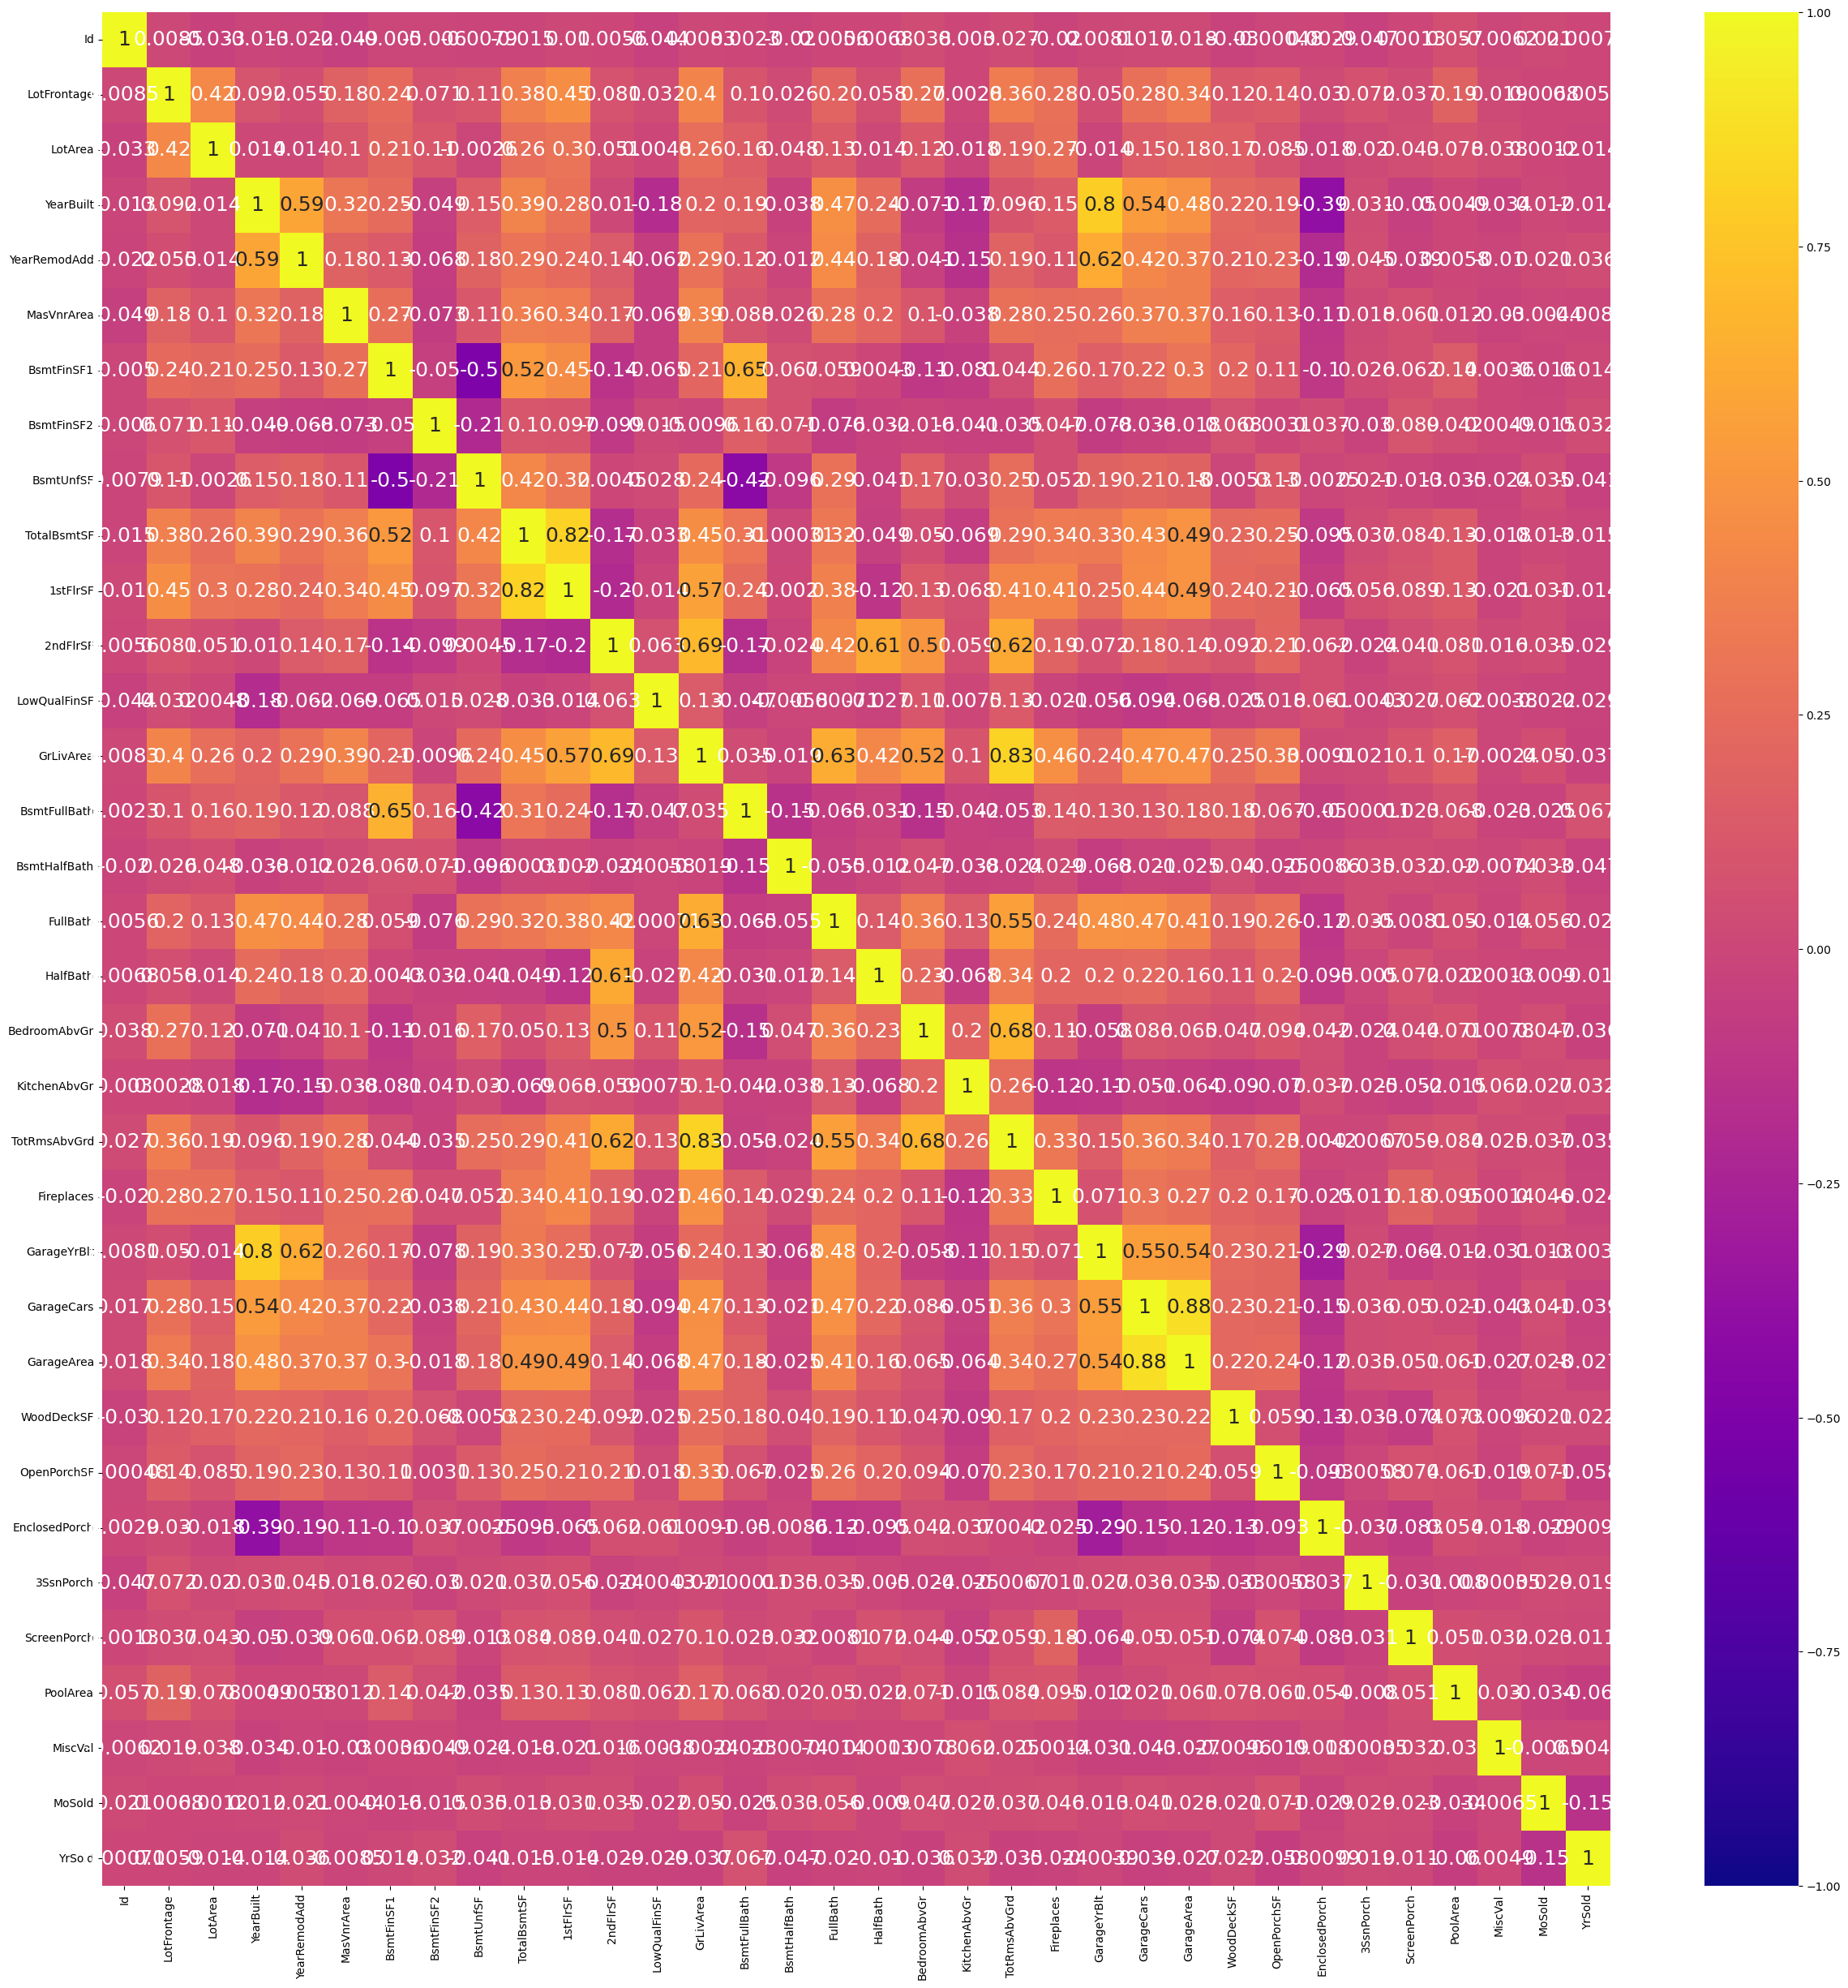

In [32]:
plt.figure(figsize=(30,30))

sns.heatmap(df_num_sc.corr(), cmap='plasma', vmax=1.0, vmin=-1.0, annot=True, annot_kws={'size':18})
plt.show()

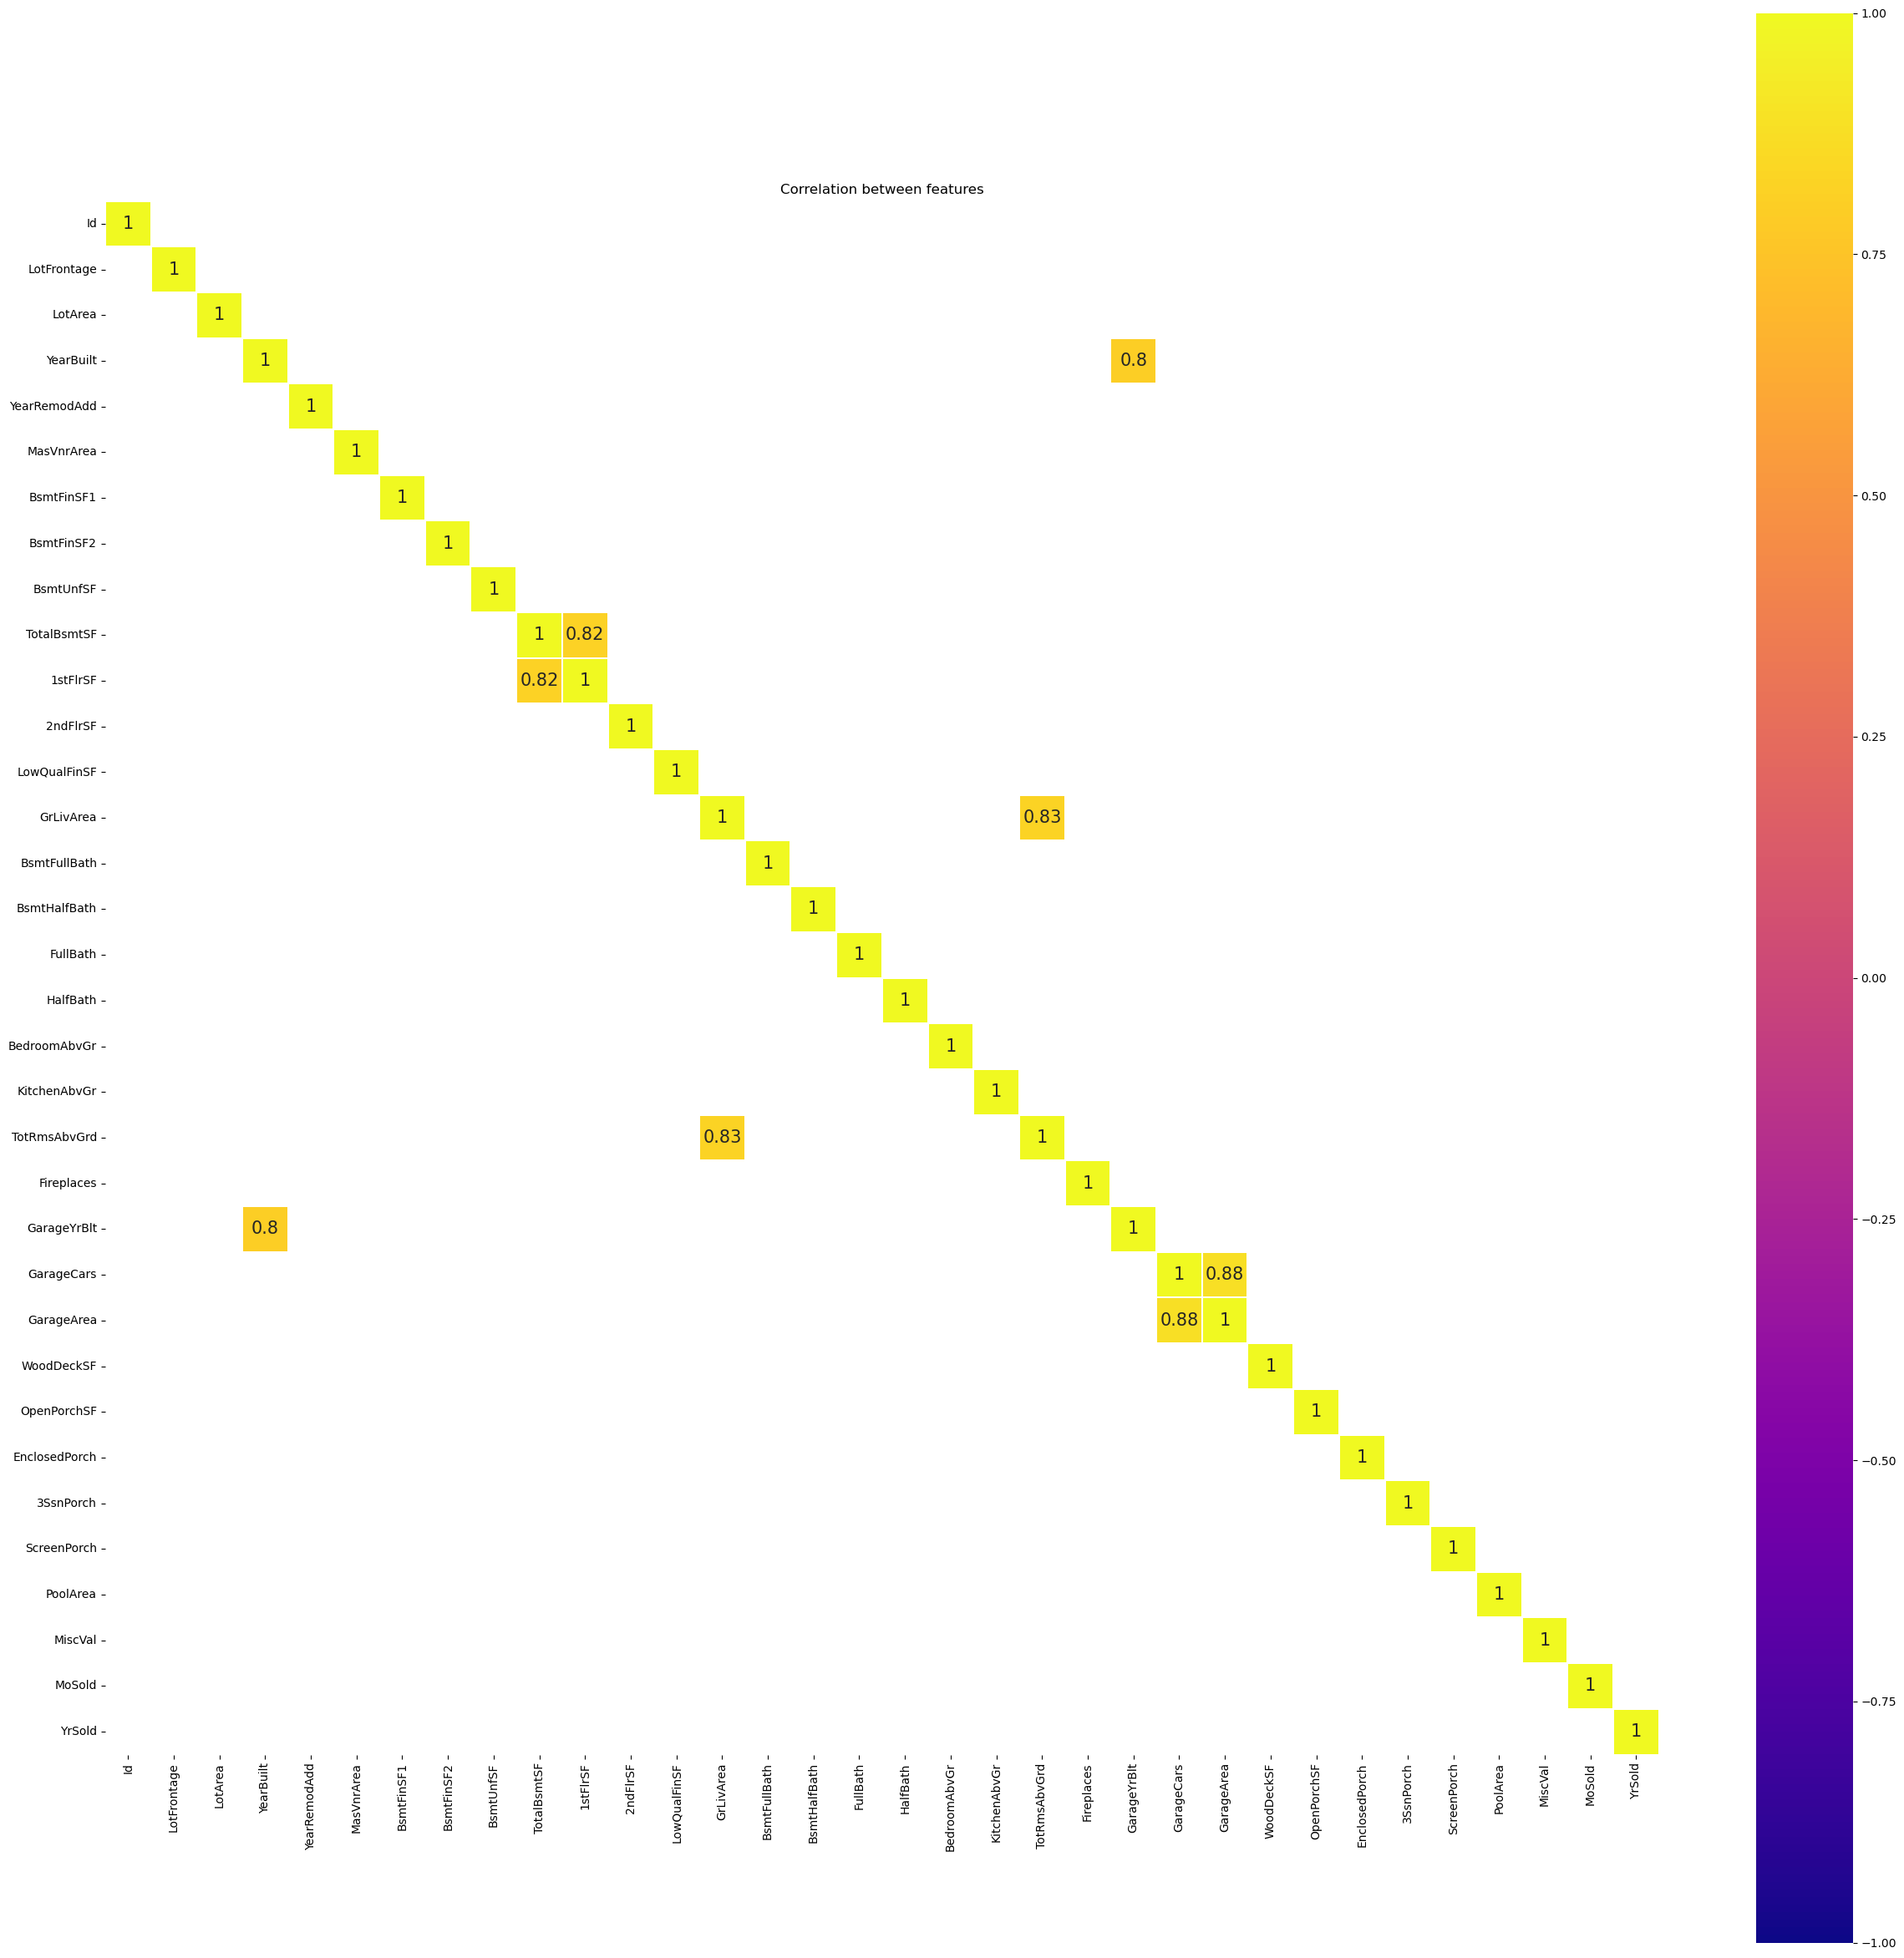

In [33]:
plt.figure(figsize=(30, 30))


sns.heatmap(df_num_sc.corr()[(df_num_sc.corr() >= 0.75) | (df_num_sc.corr() <= -0.75)],
           cmap='plasma',
            vmax=1.0,
            vmin=-1.0,
            annot=True,
            linewidths=0.1,
            annot_kws={"size": 15},
            square=True);

plt.title('Correlation between features')
plt.show()

In [34]:
!pip install sweetviz

In [35]:
import sweetviz as sv
report2_num = sv.analyze(df_num_sc)
report2_num.show_html('report2_num_sv.html')

                                             |                                             | [  0%]   00:00 ->…

Report report2_num_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [36]:
report2_cat = sv.analyze(df_cat)
report2_cat.show_html('report2_cat_sv.html')

                                             |                                             | [  0%]   00:00 ->…

Report report2_cat_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [37]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


### Base model building

In [38]:
df_target = np.log(df_price['SalePrice'])

In [1]:
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [40]:
df_num_sc.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,2.0,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,3.0,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,4.0,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,5.0,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


In [41]:
def cat_boost(cat_input, target):
    catboost = ce.cat_boost.CatBoostEncoder()
    catboost.fit(cat_input, target)
    df_encode = round(catboost.transform(cat_input),2)
    
    return df_encode

In [42]:
df_cat_en = cat_boost(df_cat, df_target)

In [43]:
df_cat_en.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava
0,12.34,12.09,12.03,11.94,12.02,12.02,12.00,12.02,12.16,12.04,12.03,12.05,12.18,12.22,12.14,11.98,12.02,12.21,12.21,12.16,12.31,12.04,12.26,12.18,12.04,11.96,12.30,12.04,12.03,12.21,12.06,12.06,12.22,12.04,12.16,12.17,12.07,12.07,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.81
1,12.05,12.09,12.03,11.94,12.02,12.02,12.03,12.02,12.32,11.82,12.03,12.05,11.99,11.97,11.91,11.98,12.02,11.86,11.86,11.89,11.84,12.04,11.87,12.18,12.04,12.36,11.95,12.04,12.03,12.21,12.06,12.06,11.81,12.04,12.16,12.17,12.07,12.07,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22
2,12.34,12.09,12.03,12.16,12.02,12.02,12.00,12.02,12.16,12.04,12.03,12.05,12.18,12.22,12.14,11.98,12.02,12.21,12.21,12.16,12.31,12.04,12.26,12.18,12.04,12.09,12.30,12.04,12.03,12.21,12.06,12.06,12.22,12.04,12.16,12.17,12.07,12.07,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22
3,11.97,12.09,12.03,12.16,12.02,12.02,12.03,12.02,12.20,12.04,12.03,12.05,12.18,12.22,12.14,11.98,12.02,11.84,11.90,11.89,11.84,12.04,11.72,11.81,12.22,11.96,11.95,12.04,12.03,11.91,12.06,12.06,12.22,12.04,11.77,11.82,12.07,12.07,12.06,11.99,11.79,12.02,12.03,12.04,12.06,12.22
4,12.34,12.09,12.03,12.16,12.02,12.02,12.03,12.02,12.66,12.04,12.03,12.05,12.18,12.49,12.14,11.98,12.02,12.21,12.21,12.16,12.31,12.04,12.26,12.18,12.04,12.16,12.30,12.04,12.03,12.21,12.06,12.06,12.22,12.04,12.16,12.17,12.07,12.07,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22


In [44]:
df_num_sc.drop('Id', axis=1, inplace=True)
df_priceDataset = pd.concat([df_num_sc, df_cat_en], axis=1)

In [45]:
df_priceDataset.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,...,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,...,12.04,12.26,12.18,12.04,11.96,12.30,12.04,12.03,12.21,12.06,12.06,12.22,12.04,12.16,12.17,12.07,12.07,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.81
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,...,12.04,11.87,12.18,12.04,12.36,11.95,12.04,12.03,12.21,12.06,12.06,11.81,12.04,12.16,12.17,12.07,12.07,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,...,12.04,12.26,12.18,12.04,12.09,12.30,12.04,12.03,12.21,12.06,12.06,12.22,12.04,12.16,12.17,12.07,12.07,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,...,12.04,11.72,11.81,12.22,11.96,11.95,12.04,12.03,11.91,12.06,12.06,12.22,12.04,11.77,11.82,12.07,12.07,12.06,11.99,11.79,12.02,12.03,12.04,12.06,12.22
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,...,12.04,12.26,12.18,12.04,12.16,12.30,12.04,12.03,12.21,12.06,12.06,12.22,12.04,12.16,12.17,12.07,12.07,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22


# Clustering

In [46]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   YearBuilt      1460 non-null   float64
 3   YearRemodAdd   1460 non-null   float64
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   float64
 6   BsmtFinSF2     1460 non-null   float64
 7   BsmtUnfSF      1460 non-null   float64
 8   TotalBsmtSF    1460 non-null   float64
 9   1stFlrSF       1460 non-null   float64
 10  2ndFlrSF       1460 non-null   float64
 11  LowQualFinSF   1460 non-null   float64
 12  GrLivArea      1460 non-null   float64
 13  BsmtFullBath   1460 non-null   float64
 14  BsmtHalfBath   1460 non-null   float64
 15  FullBath       1460 non-null   float64
 16  HalfBath       1460 non-null   float64
 17  BedroomAbvGr   1460 non-null   float64
 18  KitchenA

### Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc = StandardScaler()
df_num_standarized = pd.DataFrame(sc.fit_transform(df_num_sc), columns=df_num_sc.columns)

In [49]:
df_num_standarized.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.249679,-0.207142,1.050994,0.878668,0.507566,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.033987,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,0.382529,-0.091886,0.156734,-0.429577,-0.575352,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.068093,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,-0.123237,0.073480,0.984752,0.830215,0.319713,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.952352,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,-0.460415,-0.096897,-1.863632,-0.720298,-0.575352,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.829898,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.551118,0.375148,0.951632,0.733308,1.358429,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.911534,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


In [50]:
from sklearn.cluster import KMeans

cluster_range = range(1,11)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init=15, random_state=2)
    
    clusters.fit(df_num_standarized)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors':cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,48180.000000
1,2,41890.746784
2,3,39365.657085
3,4,37779.203005
4,5,36161.571614
5,6,34950.098490
6,7,33888.401954
7,8,32412.419288
8,9,31579.516634
9,10,30451.167186


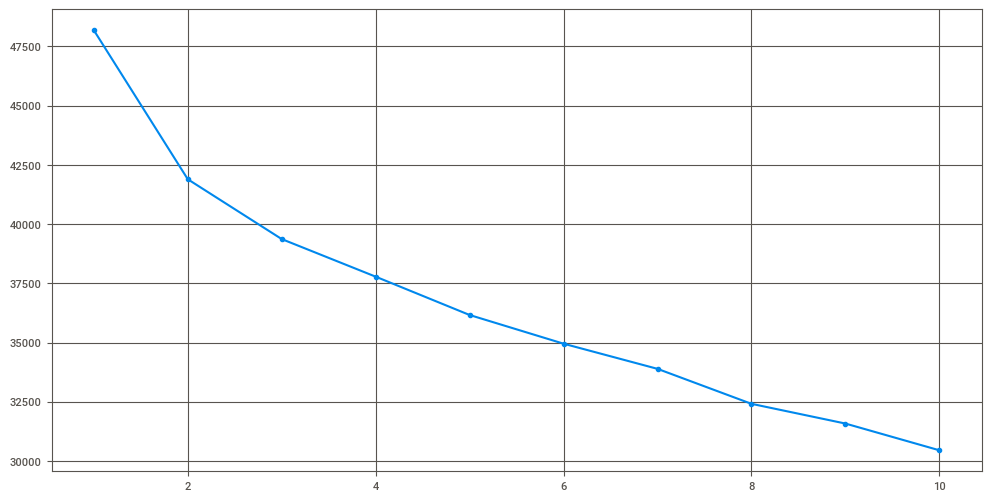

In [52]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.grid()

### Silhouette Score

In [53]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [54]:
n_clusters = [2,3,4,5]

for K in n_clusters:
    cluster = KMeans(n_clusters=K, random_state=10)
    predict = cluster.fit_predict(df_num_sc)
    score = silhouette_score(df_num_sc, predict, random_state=10)
    print('For {} clusters the silhouette score is {}'.format(K,score))

For 2 clusters the silhouette score is 0.9630117731427149
For 3 clusters the silhouette score is 0.8241815230538115
For 4 clusters the silhouette score is 0.44085375167939195
For 5 clusters the silhouette score is 0.4292344299198705


### Visulaization of silhouette score

In [58]:
from yellowbrick.cluster import SilhouetteVisualizer

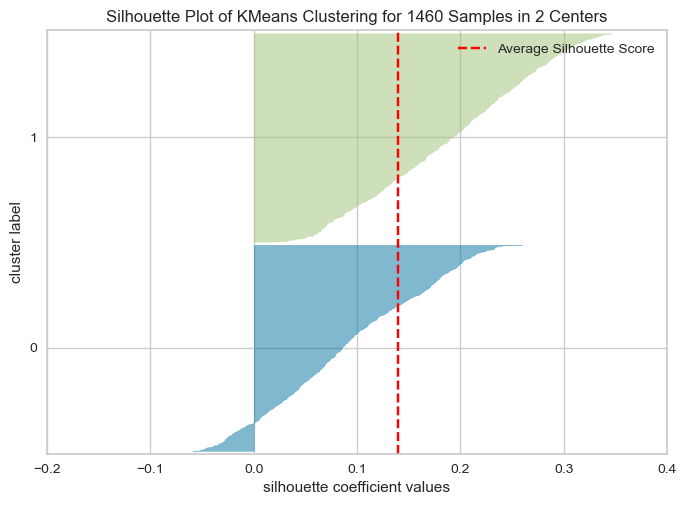

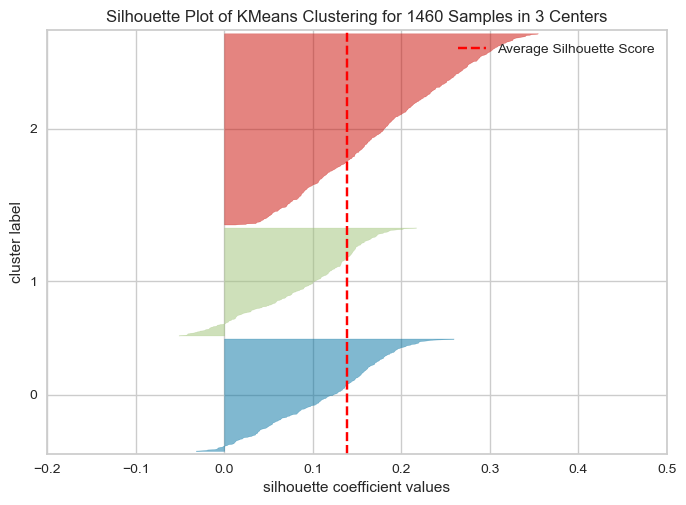

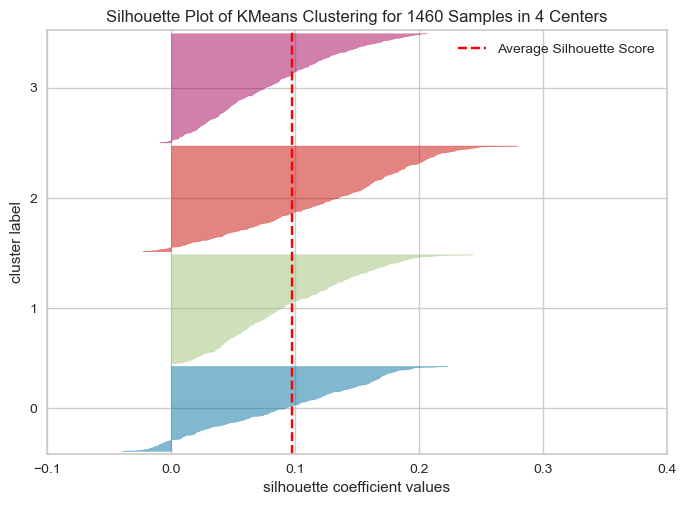

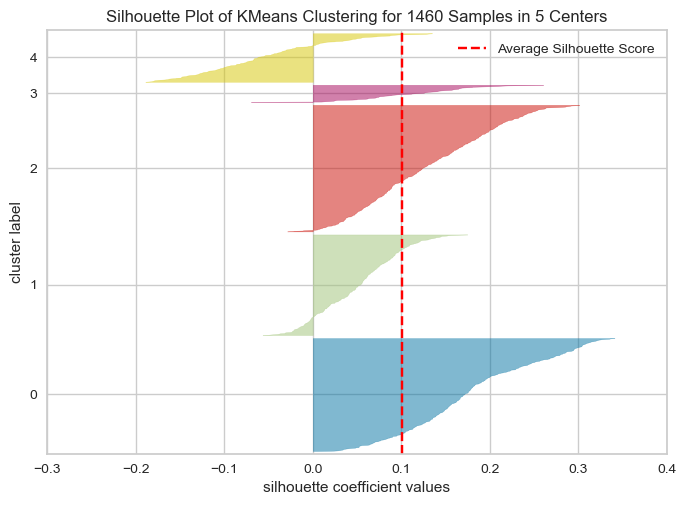

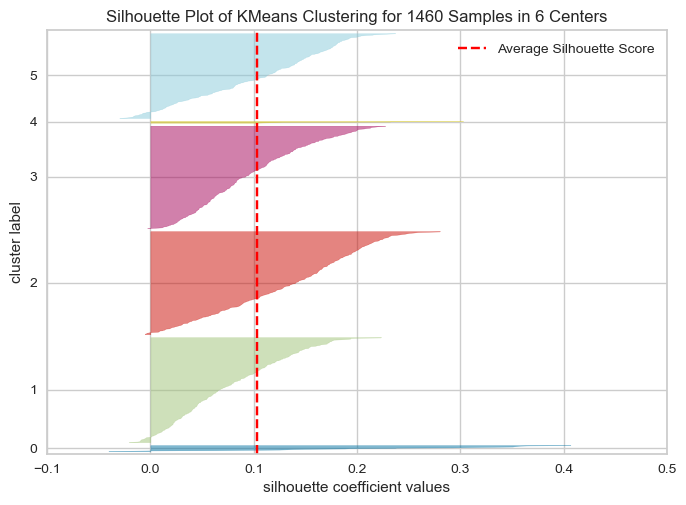

In [59]:
for i in range(2,7):
  kms=KMeans(n_clusters=i)
  kms.fit(df_num_standarized)
  model = KMeans(n_clusters=i, random_state=42)
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
  visualizer.fit(df_num_standarized)        # Fit the data to the visualizer
  visualizer.show()

### PCA

In [63]:
from sklearn.decomposition import PCA

In [64]:
pca_hp = PCA().fit(df_num_standarized)

In [65]:
pca_hp.explained_variance_     # amount of variation being captured

array([6.54353361e+00, 3.14940350e+00, 2.49250925e+00, 1.88558163e+00,
       1.30862799e+00, 1.15532983e+00, 1.12565758e+00, 1.11749560e+00,
       1.08169860e+00, 1.03660998e+00, 1.01614701e+00, 9.97836251e-01,
       9.51285497e-01, 9.04549835e-01, 8.90553964e-01, 8.52442134e-01,
       8.20932524e-01, 7.36588285e-01, 7.04787383e-01, 6.45942587e-01,
       6.18630181e-01, 5.84426789e-01, 4.85095019e-01, 4.21417760e-01,
       3.87062212e-01, 2.98907204e-01, 2.30707272e-01, 2.00104290e-01,
       1.53086485e-01, 1.30837023e-01, 9.48309600e-02, 1.29048446e-30,
       2.50694254e-32])

In [66]:
pca_hp.components_

array([[ 1.85504143e-01,  1.23963105e-01,  2.37022953e-01, ...,
        -8.87655490e-03,  2.16441866e-02, -1.34902338e-02],
       [ 3.55939282e-02, -1.09874289e-02, -2.28169361e-01, ...,
         2.82154476e-02,  2.98007547e-02, -3.79333110e-02],
       [ 2.83235102e-01,  2.88379064e-01, -3.13173821e-01, ...,
         4.07789834e-02, -1.71710864e-02,  6.59943716e-03],
       ...,
       [ 4.84130777e-02, -1.05211350e-02, -1.90438733e-01, ...,
         1.39300288e-02, -6.27049566e-03,  6.08781038e-03],
       [ 1.20816880e-16,  4.15542807e-17, -1.34374330e-16, ...,
         8.39863567e-18, -2.08245371e-16,  1.35810555e-16],
       [-0.00000000e+00,  2.20549438e-16, -4.94192280e-17, ...,
        -9.61096027e-18,  4.82429268e-17,  2.51707707e-17]])

In [68]:
pca_hp.n_components_

33

In [69]:
var = np.cumsum(np.round(pca_hp.explained_variance_ratio_, decimals=3)*100)
var

array([ 19.8,  29.3,  36.8,  42.5,  46.5,  50. ,  53.4,  56.8,  60.1,
        63.2,  66.3,  69.3,  72.2,  74.9,  77.6,  80.2,  82.7,  84.9,
        87. ,  89. ,  90.9,  92.7,  94.2,  95.5,  96.7,  97.6,  98.3,
        98.9,  99.4,  99.8, 100.1, 100.1, 100.1])

In [70]:
# Dimensions reduced from 33 to 16
pca_hp_new = PCA(n_components=16)
data_reduced = pca_hp_new.fit_transform(df_num_standarized)
data_reduced.transpose()

array([[ 1.27462105,  0.18813539,  1.46083074, ...,  0.61341686,
        -2.65925472, -0.58958449],
       [ 0.13334848, -1.01496421,  0.05617529, ...,  3.21905387,
        -1.77731196, -1.3758941 ],
       [-1.47793666,  0.82570867, -1.32965182, ...,  0.93185535,
         2.1350852 ,  1.63878932],
       ...,
       [-0.36763536,  0.55663768,  0.01078939, ...,  1.63605072,
         0.65018922, -0.01204624],
       [ 0.54049422, -0.35340443,  0.07443371, ..., -2.07603779,
        -1.89164701, -0.67629844],
       [-0.93769317, -0.55650462,  0.05619673, ..., -0.59512707,
         1.21888912,  1.15876325]])

In [71]:
pca_df_hp = pd.DataFrame(data_reduced)
pca_df_hp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.274621,0.133348,-1.477937,-2.318666,1.362039,-0.680263,-0.234252,0.065462,-0.381894,0.467914,-0.243387,-0.428211,0.787091,-0.367635,0.540494,-0.937693
1,0.188135,-1.014964,0.825709,0.159661,-1.115041,1.431809,2.804885,-0.441798,0.180904,-0.206902,-0.661890,-2.600900,0.098782,0.556638,-0.353404,-0.556505
2,1.460831,0.056175,-1.329652,-1.719209,0.090722,0.492256,-0.442191,0.013977,-0.154443,0.043635,0.125836,0.725231,0.142005,0.010789,0.074434,0.056197
3,-0.600644,1.091598,0.957724,-0.086739,0.446289,-0.668260,-0.729918,1.019939,-2.814107,-1.245881,1.434557,0.429839,2.675414,1.480475,-0.007093,-0.230740
4,4.161743,0.958955,-0.586033,-1.695806,0.132288,1.317647,-0.121759,-0.125474,-0.120005,-0.660932,0.152124,0.948639,-0.066569,0.469632,0.144949,0.472330


In [72]:
pca_df_hp.columns=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15']
pca_df_hp.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,1.274621,0.133348,-1.477937,-2.318666,1.362039,-0.680263,-0.234252,0.065462,-0.381894,0.467914,-0.243387,-0.428211,0.787091,-0.367635,0.540494,-0.937693
1,0.188135,-1.014964,0.825709,0.159661,-1.115041,1.431809,2.804885,-0.441798,0.180904,-0.206902,-0.661890,-2.600900,0.098782,0.556638,-0.353404,-0.556505
2,1.460831,0.056175,-1.329652,-1.719209,0.090722,0.492256,-0.442191,0.013977,-0.154443,0.043635,0.125836,0.725231,0.142005,0.010789,0.074434,0.056197
3,-0.600644,1.091598,0.957724,-0.086739,0.446289,-0.668260,-0.729918,1.019939,-2.814107,-1.245881,1.434557,0.429839,2.675414,1.480475,-0.007093,-0.230740
4,4.161743,0.958955,-0.586033,-1.695806,0.132288,1.317647,-0.121759,-0.125474,-0.120005,-0.660932,0.152124,0.948639,-0.066569,0.469632,0.144949,0.472330


<Axes: >

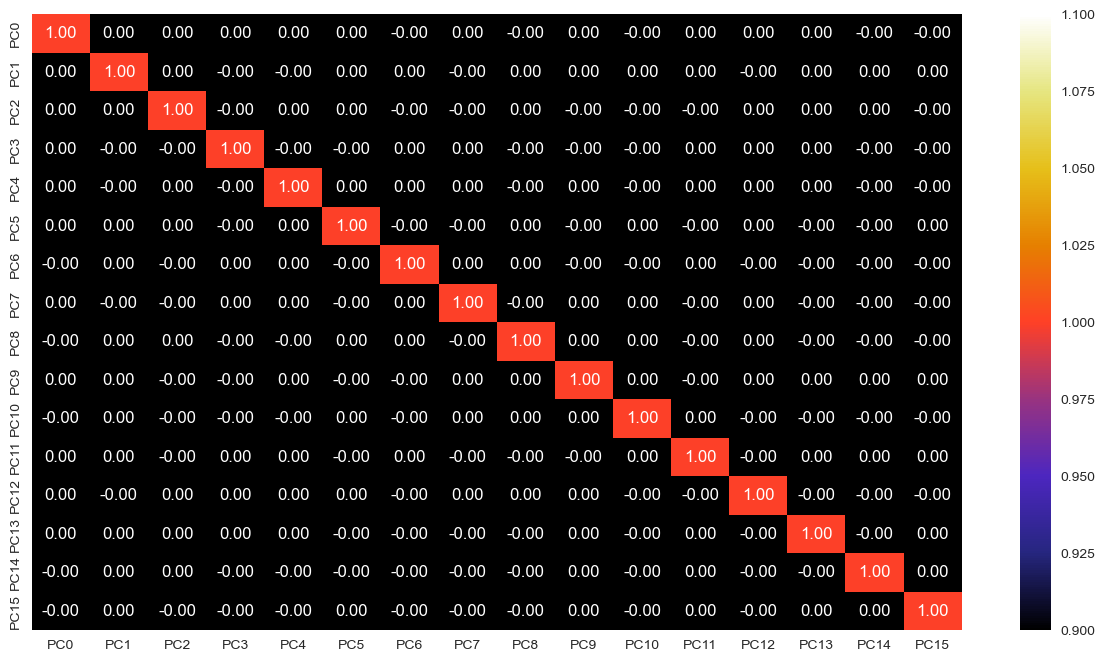

In [76]:
plt.figure(figsize=(15,8))
sns.heatmap(pca_df_hp.corr(), annot=True, fmt='.2f', cmap='CMRmap', vmin=1, vmax=1)

In [78]:
X = df_priceDataset
y = df_target

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=123, test_size=0.3)

In [96]:
from sklearn import tree

# all the regressors for Randomforest, Neural Netwrok
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# performance tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [97]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes

rfr = RandomForestRegressor(random_state=123)

### Decision Tree

In [98]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=123)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(random_state=123)

In [99]:
dtr.score(x_train, y_train)

1.0

In [100]:
dtr.score(x_test, y_test)

0.7481108320179339

In [101]:
## RMSE for decision tree

In [102]:
np.sqrt(mean_squared_error(y_train, dtr.predict(x_train)))

0.0

In [104]:
np.sqrt(mean_squared_error(y_test, dtr.predict(x_test)))

0.19101706691862338

In [105]:
# we now fine tune the models...

param_grid = {
    'max_depth': [10,15,20,25,30], # 3,5,7,9
    'min_samples_leaf': [3, 15,30], # this is 1-3 % of train data
    'min_samples_split': [15,30,35,40,50], # 3 times the min sample leaf
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 35}


In [109]:
dtr = tree.DecisionTreeRegressor(**grid_search.best_params_)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=35)

In [110]:
print('Score for training', dtr.score(x_train, y_train))
print('Score for testing', dtr.score(x_test, y_test))

Score for training 0.8877462093220317
Score for testing 0.7685677284931144


In [113]:
print('RMSE for training', np.sqrt(mean_squared_error(y_train, dtr.predict(x_train))))
print('RMSE for testing', np.sqrt(mean_squared_error(y_test, dtr.predict(x_test))))

RMSE for training 0.13629099288589927
RMSE for testing 0.1830962228509641


### Stochastic Gradient Boosting

In [124]:
from sklearn.linear_model import SGDRegressor

In [127]:
sgd = SGDRegressor()
sgd.fit(x_train,y_train)

SGDRegressor(random_state=123)

In [128]:
print("RMSE for training",np.sqrt(mean_squared_error(y_train,sgd.predict(x_train))))
print("RMSE for testing",np.sqrt(mean_squared_error(y_test,sgd.predict(x_test))))

RMSE for training 1.152918548161491e+17
RMSE for testing 1.2199038574190467e+17


### XGboost

In [119]:
from xgboost import XGBRegressor

In [122]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [123]:
print("RMSE for training",np.sqrt(mean_squared_error(y_train,xgb.predict(x_train))))
print("RMSE for testing",np.sqrt(mean_squared_error(y_test,xgb.predict(x_test))))

RMSE for training 0.004058972738622665
RMSE for testing 0.13408883369306168


### Feature Selection and use of Pipeline

In [129]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [134]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=0, test_size=0.3)

In [135]:
pipe = Pipeline((
("sfm",SelectFromModel(estimator=RandomForestRegressor(),max_features=70)),
("lr", LinearRegression()),
))

pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

Training R2
0.8638721980251526
Testing R2
0.7989667805781382


### Scaling with Pipeline and Cross Val Score

In [136]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [137]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=0, test_size=0.3)

In [139]:
pipe = Pipeline((
("sc",StandardScaler()),
("lr", LinearRegression()),
))

pipe.fit(Xtrain,ytrain)

print("Training R2")
print(pipe.score(Xtrain,ytrain))

print("Testing R2")
print(pipe.score(Xtest,ytest))

print('Series of score 10')
CrossValScore = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(CrossValScore)

print('Mean R2')
print(np.mean(CrossValScore))

Training R2
0.9136179970037146
Testing R2
0.8432469336419177
Series of score 10
[0.90788939 0.77005998 0.85840318 0.8426557  0.87738777 0.91123555
 0.88189041 0.92065776 0.91638359 0.90123348]
Mean R2
0.8787796813089077


### Application of RFE-Feayure selection using Pipeline

In [141]:
pipe = Pipeline((
("rfe",RFE(estimator=LinearRegression(), n_features_to_select=50)),
("lr", LinearRegression()),
))

pipe.fit(Xtrain,ytrain)

print("Training R2")
print(pipe.score(Xtrain,ytrain))

print("Testing R2")
print(pipe.score(Xtest,ytest))

print('Series of score 10')
CrossValScore = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(CrossValScore)

print('Mean R2')
print(np.mean(CrossValScore))

Training R2
0.8836850057063408
Testing R2
0.843976324134869
Series of score 10
[0.87283549 0.83756994 0.85603393 0.85688948 0.83911845 0.87889833
 0.80999352 0.88936143 0.85134402 0.86412936]
Mean R2
0.8556173950121435
